In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# --- Daten laden: California Housing Datensatz von Scikit-Learn ---
data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [18]:
# --- Daten vorbereiten ---
# X = Die Merkmale
# y = Das Ziel (Der Preis -> 'MedHouseVal')
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
# Aufteilen in Training (80%) und Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# --- Modell trainieren ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Vorhersagen & Evaluieren ---
y_pred = model.predict(X_test)

In [20]:
# Fehler berechnen
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score (Bestimmtheitsmaß): {r2:.2f}")  # Sollte ca. 0.80 - 0.81 sein
print(f"RMSE (Durchschnittl. Fehler): {rmse:.2f}")

R² Score (Bestimmtheitsmaß): 0.81
RMSE (Durchschnittl. Fehler): 0.51


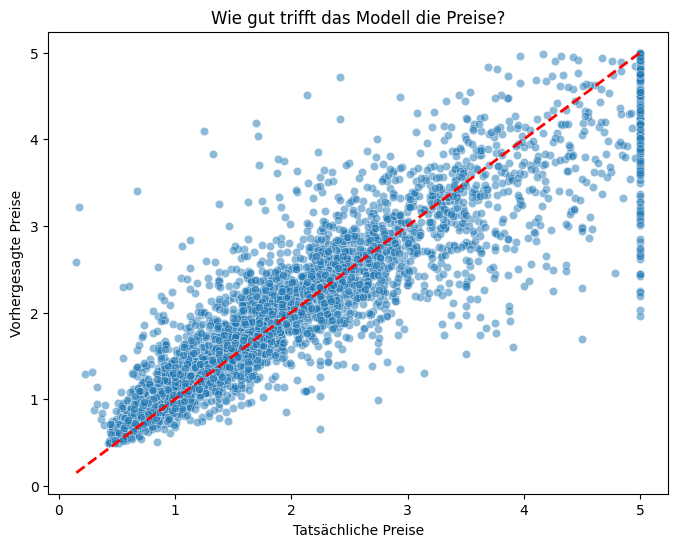

In [21]:
# --- Visualisierung ---
plt.figure(figsize=(8, 6))
# Streudiagramm: Echtes Ergebnis vs. Vorhersage
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
# Rote Linie: Das wäre die perfekte Vorhersage
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Tatsächliche Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Wie gut trifft das Modell die Preise?")
plt.show()